# Aula 3 - Processamento de Imagens

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.style.use('seaborn')

In [2]:
# Shapering
image = cv2.imread("imagens/eiffel.jpg")
cv2.imshow("Eiffel", image)
cv2.waitKey()

filter_sharpening = np.array([[-1,-1,-1], [-1, 9, -1], [-1, -1, -1]])
image_sharpening = cv2.filter2D(image, -1, filter_sharpening)
cv2.imshow("Eiffel Sharpening", image_sharpening)

cv2.waitKey()
cv2.destroyAllWindows()

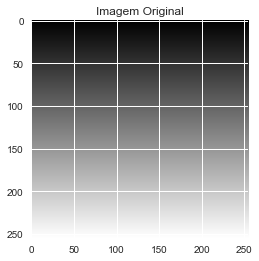

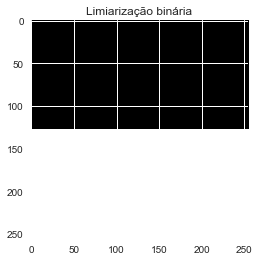

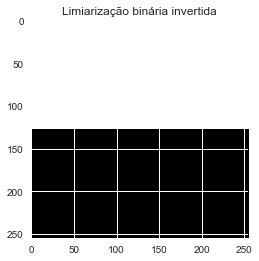

In [3]:
# Thresholding
image = cv2.imread("imagens/gradiente.png")
plt.title("Imagem Original")
plt.imshow(image)
plt.show()

ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.title("Limiarização binária")
plt.imshow(t_image)
plt.show()

ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
plt.title("Limiarização binária invertida")
plt.imshow(t_image)
plt.show()

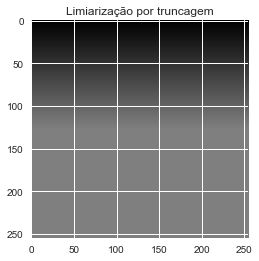

In [4]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
plt.title("Limiarização por truncagem")
plt.imshow(t_image)
plt.show()

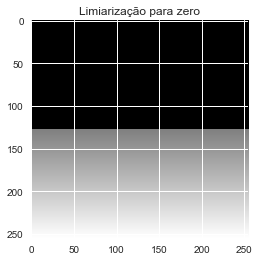

In [5]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
plt.title("Limiarização para zero")
plt.imshow(t_image)
plt.show()

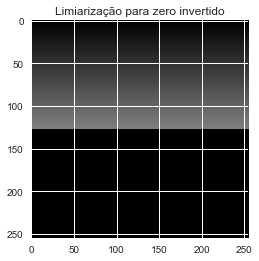

In [6]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
plt.title("Limiarização para zero invertido")
plt.imshow(t_image)
plt.show()

# Thresholding adaptativo

In [7]:
image = cv2.imread("imagens/sudoku.jpg",
cv2.IMREAD_GRAYSCALE)
cv2.imshow("Document Original", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
image_blur = cv2.GaussianBlur(image, (5,5), 0)
cv2.imshow("Document Blurred",image_blur)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
ret, t_image = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY)
cv2.imshow("Document Binary Threshold", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
image_blur = cv2.GaussianBlur(image, (5,5), 0)
ret, t_image = cv2.threshold(image_blur, 90, 255, cv2.THRESH_BINARY)
cv2.imshow("Document Blurred and Threshold",t_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
t_image = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imshow("Document Adaptative Filter", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# Ajuste finos do automatico (15, 5) - Removendo mais ruidos
t_image = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
cv2.imshow("Document Adaptative Filter", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

# Erosão e Dilatação

In [13]:
image = cv2.imread("imagens/lanes.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Lanes", image)
cv2.waitKey()
cv2.destroyAllWindows()

image_blur = cv2.GaussianBlur(image, (5,5), 0)
ret, t_image = cv2.threshold(image_blur, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Document Blurred and Threshold", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
# Dilatacao 
# Iterations ajuda em um ajuste fino na imagem, já que o kernel só pode ser valores impares
kernel = np.ones((5,5), np.uint8)
image_dilated = cv2.dilate(t_image, kernel, iterations=1)
cv2.imshow("Lanes Dilated", image_dilated)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
# Erosão
# Iterations ajuda em um ajuste fino na imagem, já que o kernel só pode ser valores impares
kernel = np.ones((5,5), np.uint8)
image_eroded = cv2.erode(image_dilated, kernel, iterations=1)
cv2.imshow("Lanes Eroded", image_eroded)
cv2.waitKey()
cv2.destroyAllWindows()

# Detecção de Bordas

In [16]:
# Sobel
image = cv2.imread("imagens/thanos2.jpg", cv2.IMREAD_GRAYSCALE)
ret,binary = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
sobel_x = cv2.Sobel(binary, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(binary, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow("Thanos Sobel X", binary)
cv2.waitKey()

cv2.imshow("Thanos Sobel Y", sobel_y)
cv2.waitKey()

sobel_xy = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow("Thanos Sobel XY", sobel_y)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
# Laplaciano
laplacian = cv2.Laplacian(binary, cv2.CV_64F)
cv2.imshow("Thanos Laplacian", laplacian)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
# Canny
# Com a Imagem Binaria
canny = cv2.Canny(binary, 30, 190)
cv2.imshow("Thanos Canny", canny)
cv2.waitKey()

# Com a Imagem Original
canny = cv2.Canny(image, 70, 150)
cv2.imshow("Thanos Canny Grayscale", canny)
cv2.waitKey()
cv2.destroyAllWindows()

# Desafio 1
Crie uma função para transformar uma imagem colorida em um desenho (sketch) com fundo branco e traços na cor preta.  
A imagem abaixo de exemplo se encontra na pasta imagens no repositório do GitHub.  
Experimente sua webcam par ter o efeito on-line

In [19]:
def desenha_imagem(image):
    # Transforma para Preto e Branco
    imagem_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Suaviliza 7: 7:
    image_grayscale_blur = cv2.GaussianBlur(imagem_grayscale, (7,7), 0)
    # Detecção de Bordas 10: Inicio da cor da borda 80: Fim da cor da borda
    image_canny = cv2.Canny(image_grayscale_blur, 10, 80)
    # Retia ruido e inverte as cores 30:Localiza essa cor 255: altera por essa
    _, image_canny_inverted = cv2.threshold(image_canny, 30, 255, cv2.THRESH_BINARY_INV)
    
    # _, ignora o parametro recebido
    return image_canny_inverted

In [20]:
# Carrega Imagem
image = cv2.imread("imagens/robocop.jpg")

In [21]:
imagem_nova = desenha_imagem(image)
cv2.imshow("Imagem Desenha", imagem_nova)
cv2.waitKey()
cv2.destroyAllWindows()

# Segmentação de Imagens

In [22]:
# Somente os contornos externos
image = cv2.imread("imagens/formas_1.png")
cv2.imshow("Formas 1", image)
cv2.waitKey()
cv2.destroyAllWindows()

image_grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image_grayscale, 30, 180)
cv2.imshow("Formas 1 Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

_, contours, hierarchy = cv2.findContours(image_edged,
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))
cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2.imshow("Formas 1 Contours", image)
cv2.waitKey()
cv2.destroyAllWindows()

Contornos encontrados 3


In [23]:
# Identificando online
inc = 1

for idx, contour in enumerate(contours):
    print(idx)
    inc += 30
    cv2.drawContours(image, [contour], -1, (100+inc, 0, inc), 3)
    cv2.imshow("Formas 1 Contours", image)
    cv2.waitKey()
cv2.destroyAllWindows()

0
1
2


In [24]:
# Com os contornos externos e internos
image = cv2.imread("imagens/formas_2.png")
cv2.imshow("Formas 1", image)
cv2.waitKey()
cv2.destroyAllWindows()

image_grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image_grayscale, 30, 180)
cv2.imshow("Formas 1 Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

_, contours, hierarchy = cv2.findContours(image_edged,
cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))
cv2.drawContours(image, contours, -1, (0,0,255), 3)
cv2.imshow("Formas 1 Contours", image)
cv2.waitKey()
cv2.destroyAllWindows()

Contornos encontrados 10


In [25]:
# Identificando online
inc = 1

for idx, contour in enumerate(contours):
    print(idx)
    inc += 30
    cv2.drawContours(image, [contour], -1, (100+inc, 0, inc), 3)
    cv2.imshow("Formas 1 Contours", image)
    cv2.waitKey()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9


# Analisando bordas

In [26]:
# Analisando Objetos na imagems
image = cv2.imread("imagens/shapes.jpg")
print(image.shape)
cv2.imshow("Formas Diversas", image)
cv2.waitKey()
cv2.destroyAllWindows()

blank_canvas = np.zeros((image.shape[0], image.shape[1], 3))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image, 40, 180)
cv2.imshow("Formas Diversas Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

(392, 392, 3)


In [27]:
_, contours, hierarchy = cv2.findContours(image_edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))

cv2.drawContours(blank_canvas, contours, -1, (0,255,0), 2)
cv2.imshow("Formas Diversas Blank Contours", blank_canvas)

cv2.waitKey()
cv2.destroyAllWindows()

Contornos encontrados 8


In [28]:
def areas_contornos(contornos):
    areas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        areas.append(area)
    return areas

areas_contornos(contours)

[4680.0, 100.0, 0.0, 5829.5, 4236.5, 0.5, 87.0, 4851.0]

In [29]:
contornos_cleaned = []

for contorno in contours:
    if cv2.contourArea(contorno) > 1:
        contornos_cleaned.append(contorno)

# Compara após limpeza        
len(contours), len(contornos_cleaned)

(8, 6)

In [30]:
# Encontrar a centroide do objeto
def label_centroide(image, contorno, label):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    cv2.putText(image, str(label), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

In [31]:
# Ordena a lista de contornos pela maior area dos objetos encontrados
contornos_sorted = sorted(contornos_cleaned, key=cv2.contourArea, reverse=True)

# Cria uma copia da imagem
image_countor = image.copy()

# Coloca a label no objeto de acordo com o tamanho de cada objeto
for idx, contorno in enumerate(contornos_sorted):
    label_centroide(image_countor, contorno, idx+1)
    # Mostrando imagens com as labels, online
    cv2.imshow("Formas Diversas Contours", image_countor)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [32]:
# Ordenando pela posição do objeto
def posicao_x(contorno):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    return cx

# Ordenando pela posição X
contornos_sorted_x = sorted(contornos_cleaned, key=posicao_x, reverse=False)

# Cria uma cópia
image_countor = image.copy()

# Apresentando as informações nas imagens
for idx, contorno in enumerate(contornos_sorted_x):
    label_centroide(image_countor, contorno, idx+1)
    cv2.imshow("Formas Diversas Contours", image_countor)
    cv2.waitKey()
    cv2.destroyAllWindows()

# Aproximação de contornos

In [33]:
image = cv2.imread("imagens/house.png")
print(image.shape)

cv2.imshow("House", image)
cv2.waitKey()
cv2.destroyAllWindows()

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image_binary = cv2.threshold(image_gray, 125, 255,cv2.THRESH_BINARY_INV)

cv2.imshow("House Binary", image_binary)
cv2.waitKey()
cv2.destroyAllWindows()

(500, 500, 3)


In [38]:
# Delimitando
_, contours, hierarchy = cv2.findContours(image_binary.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
image_rect = image.copy()

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    cv2.rectangle(image_rect, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    
cv2.imshow("House Rectangle", image_rect)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
# Aproximação de Poligonos

image_contour_approx = image.copy()

for contour in contours:
    precision = 0.03 * cv2.arcLength(contour, True)
    approx_contour = cv2.approxPolyDP(contour, precision, True)
    cv2.drawContours(image_contour_approx, [approx_contour], 0, (0, 255, 0), 2)

cv2.imshow("House Rectangle", image_contour_approx)
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
# Aproximação por Casca convexa
image = cv2.imread("imagens/hand.jpg")
print(image.shape)
cv2.imshow("Hand", image)
cv2.waitKey()
cv2.destroyAllWindows()

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image, 120, 255)
cv2.imshow("Hand Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

(387, 600, 3)


In [42]:
image_contour_approx = image.copy()

_, contours, hierarchy = cv2.findContours(image_edged.copy(), cv2.RETR_LIST,
cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=False)
contours[:len(contours)-1]

for contour in contours:
    convex_hull = cv2.convexHull(contour)
    cv2.drawContours(image_contour_approx, [convex_hull], 0, (0, 255, 0), 2)
    
cv2.imshow("Hand Hull", image_contour_approx)
cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
image_contour_approx = image.copy()

for contour in contours:
    convex_hull = cv2.convexHull(contour)
    area = cv2.contourArea(contour)
    
print(area)

if area > 100:
    cv2.drawContours(image_contour_approx, [convex_hull], 0, (0, 255, 0), 2)

cv2.imshow("Hand Hull", image_contour_approx)
cv2.waitKey()
cv2.destroyAllWindows()

345.0


# Desafio 2
Dado uma imagem de captcha (no repositório, “imagens/dots.png”) obtenha o contorno dos caracteres e o exibia na imagem original.  
Realize a seguinte ordem: suavização, limiarização, dilatação/erosão, detecção de contornos.  
Bônus: use a função de enlaçamento de retângulo para extrair as letras.

In [46]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [63]:
image = cv2.imread("imagens/captcha-2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Captcha", image)
cv2.waitKey()
cv2.destroyAllWindows()

Aplicando suavização para posterior limiarização

In [64]:
image_blur = cv2.blur(image, (5, 5))
cv2.imshow("Old Person Blur", image_blur)
cv2.waitKey()
cv2.destroyAllWindows()

Aplicando limiarização para extração de ruídos

In [65]:
ret, t_image = cv2.threshold(image_blur, 160, 255, cv2.THRESH_BINARY)

cv2.imshow("Captcha T", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

Erodindo para enaltecer as letras. Lembrando que preto é ausência de informação logo, erodir significa abrir e "engrossa" as letras

In [66]:
kernel = np.ones((3,3), np.uint8)
image_eroded = cv2.erode(t_image, kernel, iterations=1)

cv2.imshow("Captcha Td", image_eroded)
cv2.waitKey()
cv2.destroyAllWindows()

Aplicando filtro Canny para detecção de bordas

In [67]:
image_edged = cv2.Canny(image_eroded, 30, 180)
cv2.imshow("Formas 2 Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

Dilatando as bordas para melhorar a detecção de contornos

In [68]:
kernel_d = np.ones((1,1), np.uint8)
image_dilated = cv2.dilate(image_edged, kernel_d, iterations=1)
cv2.imshow("Captcha D", image_dilated)
cv2.waitKey()
cv2.destroyAllWindows()

In [69]:
_, contours, hierarchy = cv2.findContours(image_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))

Contornos encontrados 11


Se fossem encontrados mais do que as 4 letras poderíamos aplicar algum filtro de limite de tamnaho de área

In [70]:
contours_filtered = []
for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > 100:
        contours_filtered.append(contour)
        (x, y, w, h) = cv2.boundingRect(contour)
        print(str(area))
        print((x, y, w, h))
len(contours_filtered)

175.5
(214, 50, 16, 16)
396.5
(309, 38, 24, 35)


2

Desenhando os contornos na imagem original

In [71]:
image_original = cv2.imread("imagens/captcha-2.jpg")
cv2.drawContours(image_original, contours_filtered, -1, (0,255,0), 2)
cv2.imshow("Formas 2 Contours", image_original)
cv2.waitKey()
cv2.destroyAllWindows()

Extraindo letras para eventual treinamento em alguma algoritmo de rede neural, por exemplo

In [74]:
for idx, contour in enumerate(contours_filtered):
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = image_edged[y - 10:y + h + 30, x - 1:x + w + 1]
    cv2.imwrite(str(idx) + ".png", letter_image)
    cv2.rectangle(image_original, (x,y), (x+w,y+h), (0, 255, 0), 2)
    print(x, y, w, h)
    cv2.imshow("Formas 2 Contours", letter_image)
    cv2.waitKey()
    cv2.destroyAllWindows()

214 50 16 16
309 38 24 35
